<a href="https://colab.research.google.com/github/hjr0001/Portfoliwebsite/blob/main/Housingprice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File downloaded and saved as housing.csv
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


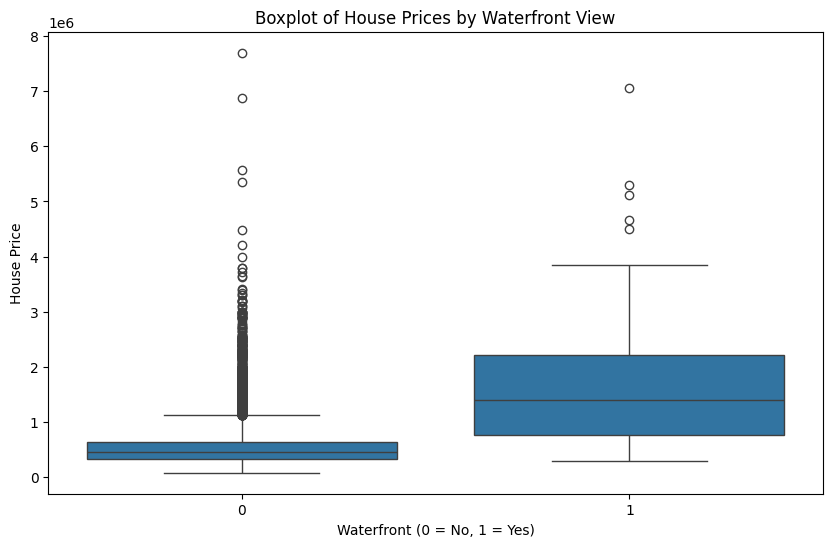

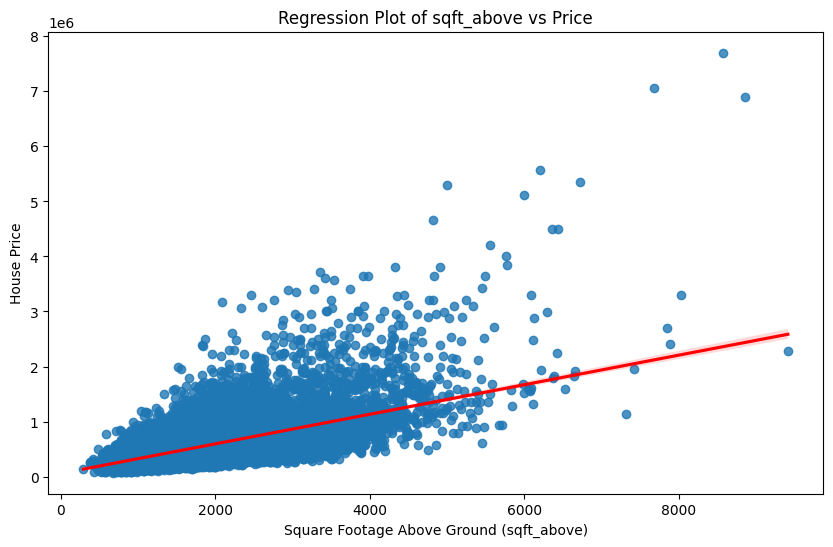

R² score (sqft_living only): 0.5033019006466926
R² score (Multiple Linear Regression): 0.6459217069635679
R² score (Polynomial Pipeline): 0.7632813328635308
R² score (Ridge): 0.6478759163939113
R² score (Polynomial + Ridge): 0.7002744233733298


In [1]:
# House Price Prediction Project

# Suppress warnings
import warnings
def warn(*args, **kwargs):
    pass
warnings.warn = warn

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score
import requests

# Download dataset
def download(url, filename):
    response = requests.get(url)
    if response.status_code == 200:
        with open(filename, "wb") as f:
            f.write(response.content)
        print(f"File downloaded and saved as {filename}")
    else:
        print(f"Failed to download file. Status code: {response.status_code}")

filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
download(filepath, "housing.csv")

# Load dataset
df = pd.read_csv("housing.csv")
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True)
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

# EDA: Unique values of floors
floor_counts_df = df['floors'].value_counts().to_frame().rename(columns={'floors': 'count'})
print(floor_counts_df)

# Boxplot: Waterfront vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x="waterfront", y="price", data=df)
plt.title("Boxplot of House Prices by Waterfront View")
plt.xlabel("Waterfront (0 = No, 1 = Yes)")
plt.ylabel("House Price")
plt.show()

# Regression plot: sqft_above vs price
plt.figure(figsize=(10, 6))
sns.regplot(x="sqft_above", y="price", data=df, line_kws={"color": "red"})
plt.title("Regression Plot of sqft_above vs Price")
plt.xlabel("Square Footage Above Ground (sqft_above)")
plt.ylabel("House Price")
plt.show()

# Linear Regression with one feature
X = df[['sqft_living']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred = lm.predict(X_test)
print("R² score (sqft_living only):", r2_score(y_test, y_pred))

# Multiple Linear Regression
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement", "view",
            "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]
X = df[features]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
lm_multi = LinearRegression()
lm_multi.fit(X_train, y_train)
y_pred = lm_multi.predict(X_test)
print("R² score (Multiple Linear Regression):", r2_score(y_test, y_pred))

# Polynomial + StandardScaler + LinearRegression pipeline
pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(include_bias=False)),
    ('model', LinearRegression())
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print("R² score (Polynomial Pipeline):", r2_score(y_test, y_pred))

# Ridge Regression
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1)
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(x_train, y_train)
y_pred = ridge_model.predict(x_test)
print("R² score (Ridge):", r2_score(y_test, y_pred))

# Polynomial Features + Ridge Regression
poly = PolynomialFeatures(degree=2, include_bias=False)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)
ridge_poly = Ridge(alpha=0.1)
ridge_poly.fit(x_train_poly, y_train)
y_pred = ridge_poly.predict(x_test_poly)
print("R² score (Polynomial + Ridge):", r2_score(y_test, y_pred))
